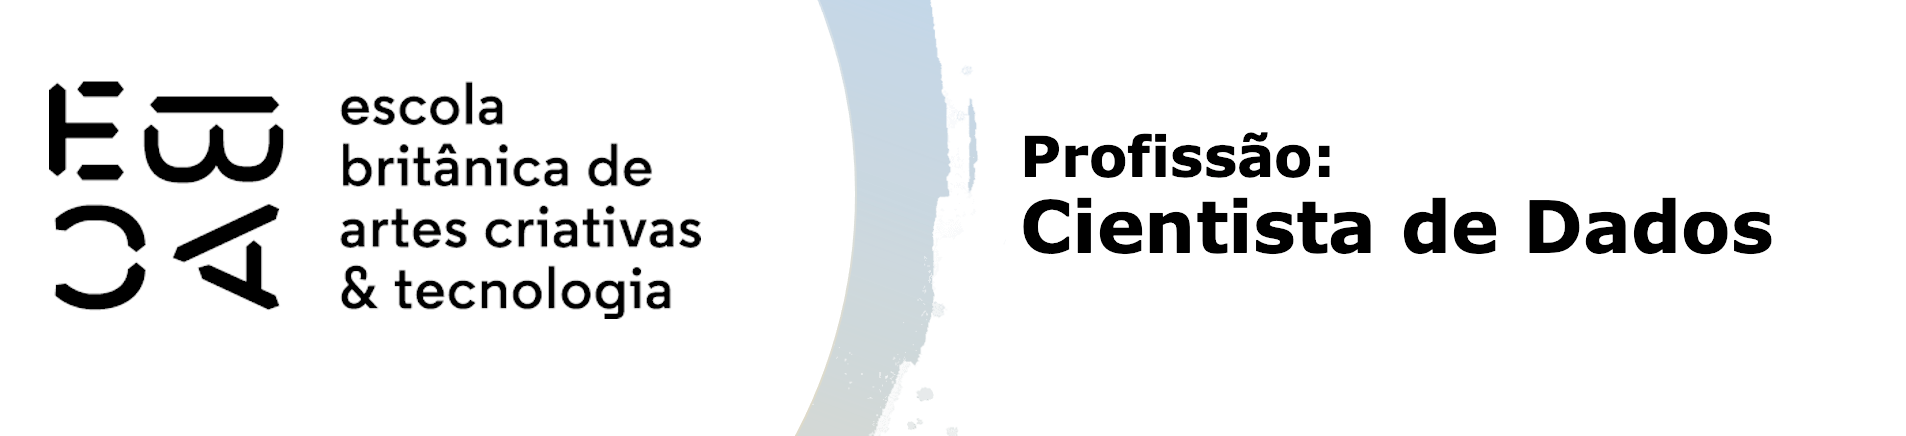

# Métodos hierárquicos de agrupamento - Tarefa

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [58]:
peng = sns.load_dataset('penguins')
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
df = peng.select_dtypes('number').dropna()
df_pad = StandardScaler().fit_transform(df)

cluster_3 = AgglomerativeClustering(linkage="complete",distance_threshold = None,n_clusters=3)
df['cluster_3'] = cluster_3.fit_predict(df_pad)

dend = shc.dendrogram(shc.linkage(df_pad, method='complete'))

In [62]:
df.cluster_3.unique()

array([1, 2, 0], dtype=int64)

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [63]:
grupo_especies = (
    peng.dropna()
    .groupby(['species'])
    .apply(
        lambda x: pd.Series(
            {'Grupo 0': (df['cluster_3'][x.index] == 0).sum(),
             'Grupo 1': (df['cluster_3'][x.index] == 1).sum(),
             'Grupo 2': (df['cluster_3'][x.index] == 2).sum(),
            }
        ),include_groups=False))

print(f"\nQuantidade de pinguins por espécie em cada grupo:\n")
grupo_especies


Quantidade de pinguins por espécie em cada grupo:



,Grupo 0,Grupo 1,Grupo 2
species,,,
Adelie,0,146,0
Chinstrap,0,14,54
Gentoo,119,0,0


In [64]:
merged_df = pd.merge(df,
                     peng,
                     on = ['bill_length_mm',
                           'bill_depth_mm',
                           'flipper_length_mm',
                           'body_mass_g'],
                     how = 'inner')

In [65]:
merged_df.head(2)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,cluster_3,species,island,sex
0,39.1,18.7,181.0,3750.0,1,Adelie,Torgersen,Male
1,39.5,17.4,186.0,3800.0,1,Adelie,Torgersen,Female


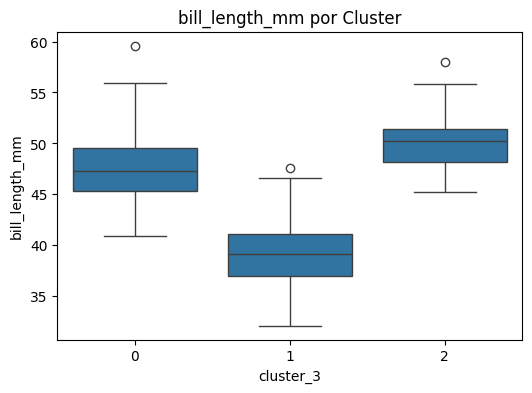

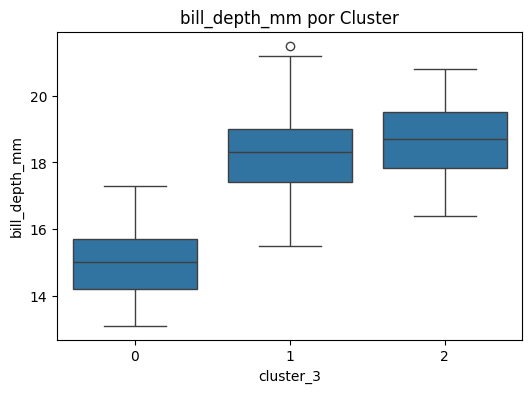

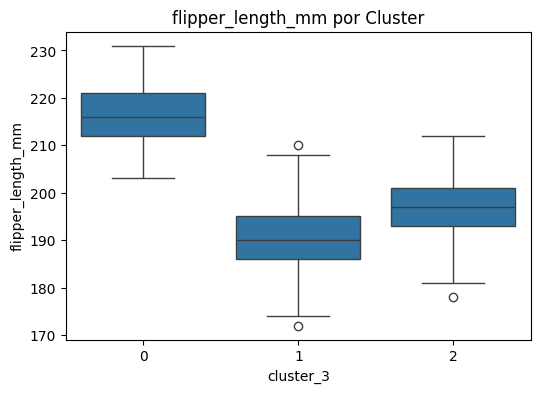

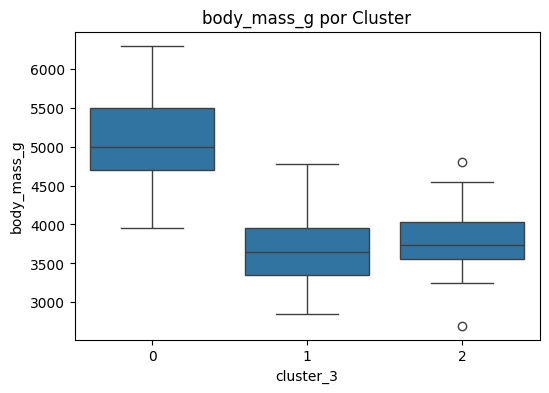

In [66]:
quantitativas = ['bill_length_mm',
                 'bill_depth_mm',
                 'flipper_length_mm',
                 'body_mass_g']

for var in quantitativas:
    plt.figure(figsize = (6, 4))
    sns.boxplot(data = merged_df, x = 'cluster_3', y = var)
    plt.title(f'{var} por Cluster')
    plt.show()

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [67]:
cluster_4 = AgglomerativeClustering(linkage = "complete", distance_threshold = None, n_clusters = 4)

df['cluster_4'] = cluster_4.fit_predict(df_pad)

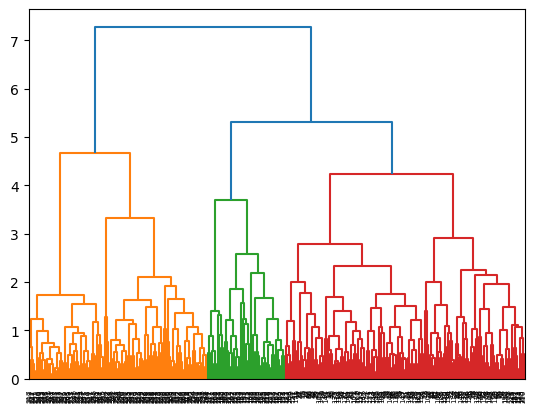

In [68]:
dend4 = shc.dendrogram(shc.linkage(df_pad, method='complete'))

In [69]:
agrupamento_4 = AgglomerativeClustering(linkage="complete",distance_threshold = None, n_clusters = 4)

df['cluster_4'] = agrupamento_4.fit_predict(df_pad)

In [70]:
grupo_especies_4 = (
    peng.dropna()
    .groupby(['species'])
    .apply(
        lambda x: pd.Series({
            'Grupo 0': (df['cluster_4'][x.index] == 0).sum(),
            'Grupo 1': (df['cluster_4'][x.index] == 1).sum(),
            'Grupo 2': (df['cluster_4'][x.index] == 2).sum(),
            'Grupo 3': (df['cluster_4'][x.index] == 3).sum()}),
        include_groups=False))


print(f"\nQuantidade de pinguins por espécie em cada grupo com 4 grupos:\n")
grupo_especies_4


Quantidade de pinguins por espécie em cada grupo com 4 grupos:



,Grupo 0,Grupo 1,Grupo 2,Grupo 3
species,,,,
Adelie,146,0,0,0
Chinstrap,14,0,54,0
Gentoo,0,70,0,49


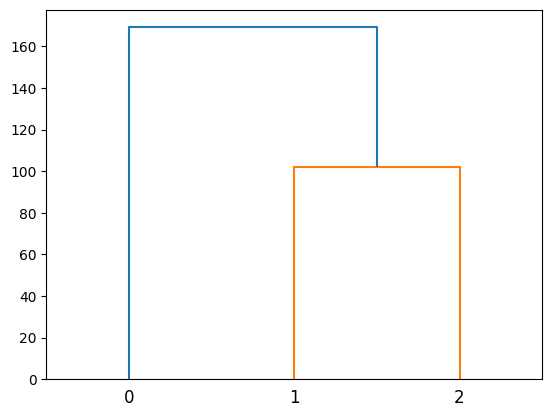

In [73]:
dend_grupo_especie4 = shc.dendrogram(shc.linkage(grupo_especies_4, method='complete'))

In [71]:
#pinguins por espécie e sexo em cada grupo

grupo_especie_sexo = peng.dropna().groupby(['species', 'sex']).apply(lambda x: pd.Series({
    'Grupo 0': (df['cluster_4'][x.index] == 0).sum(),
    'Grupo 1': (df['cluster_4'][x.index] == 1).sum(),
    'Grupo 2': (df['cluster_4'][x.index] == 2).sum(),
    'Grupo 3': (df['cluster_4'][x.index] == 3).sum()}),include_groups=False)


print(f"\nQuantidade de pinguins por espécie e sexo em cada grupo com 4 grupos:\n")
grupo_especie_sexo


Quantidade de pinguins por espécie e sexo em cada grupo com 4 grupos:



Grupo 0  Grupo 1  Grupo 2  Grupo 3
species   sex                                       
Adelie    Female       73        0        0        0
          Male         73        0        0        0
Chinstrap Female       14        0       20        0
          Male          0        0       34        0
Gentoo    Female        0        9        0       49
          Male          0       61        0        0

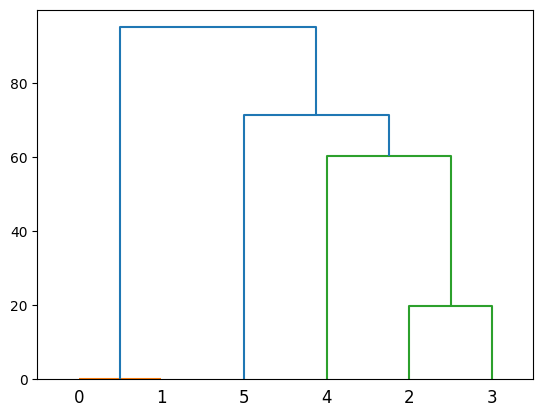

In [72]:
dend_grupo_especie_sexo = shc.dendrogram(shc.linkage(grupo_especie_sexo, method='complete'))

**Análise:**

Quando dividi em 3 grupos, em quantidade as espécies se agruparam no Grupo 1. No entanto, dividindo em 4 grupos este comportamento passou para o grupo 0, o grupo 2 preservou a quantidade de pinguins da espécie _Chinstrap_, e o grupo 0, referente à divisão em 3 grupos, dividiu-se entre grupo 1 e 3 da divisão de 4 grupos.